#  Лабораторная работа №2 «ДВПФ и ДПФ»
Курс: «Радиофизическая лаборатория» ФРКТ МФТИ


In [107]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
from scipy.linalg import dft
import scipy.integrate as integrate 

import pandas as pd

In [108]:
# Если используете Jupyter, то можно поменять backend matplotlib на notebook
# %matplotlib notebook
# Для использования backend matplotlib widget, раскомментируйте строку ниже.
# %matplotlib widget
# Для использования backend matplotlib inline, раскомментируйте строку ниже.
%matplotlib inline

plt.rcParams['axes.grid'] = True


In [109]:
variant = 10

steps = 25179

N = 9
L = 2
nu_0 = -0.1

nu = np.linspace(-0.5, 0.5, steps)

# Занятие 1. Основные свойства ДВПФ
Далее значения $N$, $L$, ${{\nu }_{0}}$ следует использовать из таблицы в соответствии с Вашим вариантом задания.

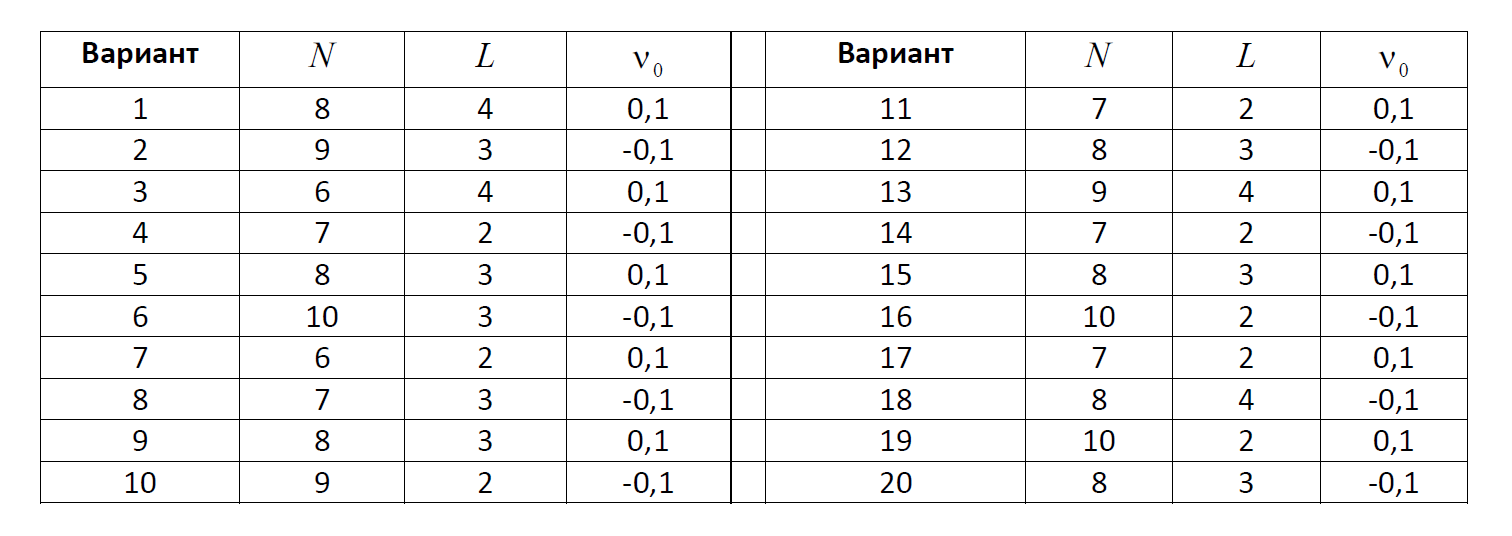

## Задача 1.1.  Прямоугольный импульс в дискретной форме.  

С помощью моделирования  вычислите и постройте график для модуля и фазы ДВПФ  $X_N(\nu)$  последовательности из $N$ последовательных единичных импульсов ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ для $\nu \in [-0,5; \;0,5]$.  Сравните результат с аналитической записью для  $X_N(\nu)$ (задача 1.б из задания к допуску).  Заполнить таблицу, используя результаты моделирования и аналитические записи. Принять частоту дискретизации равной 1 Гц. 

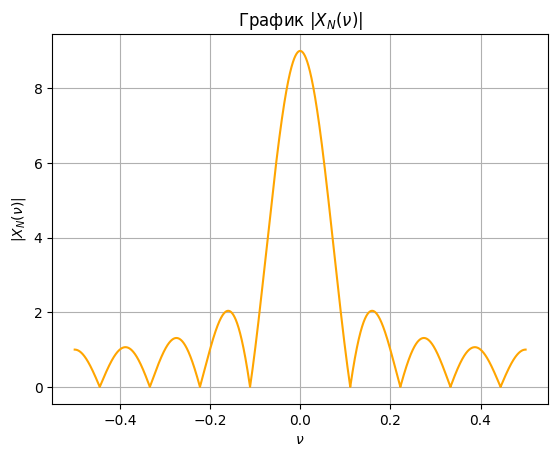

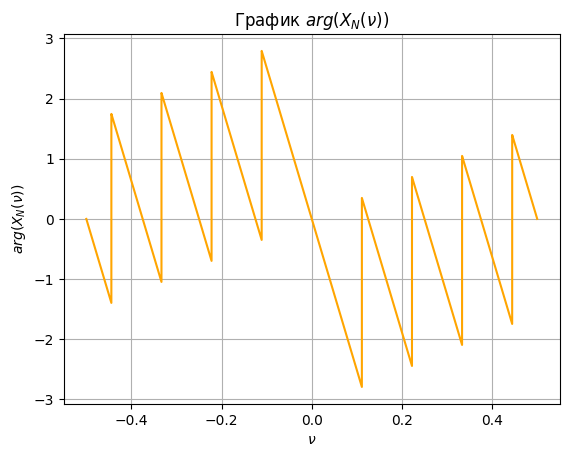

,X(0),Δν,Скачок фазы на π,Энергия² xΔt
,(9+0j),0.22,-0.44 -0.22 0.11 0.33,9.0


In [110]:
def X_N(nu):
    ret_val = 0.0
    for k in range(N):
        ret_val += np.exp(-1.j * 2 * np.pi * nu * k)
    return ret_val

X_N = np.vectorize(X_N)

plt.plot(nu, np.abs(X_N(nu)), linestyle='-', color="orange")
plt.xlabel("$\\nu$")
plt.ylabel("$|X_N(\\nu)|$")
plt.title("График $|X_N(\\nu)|$")
plt.show()

plt.plot(nu, np.angle(X_N(nu)), linestyle='-', color="orange")
plt.xlabel("$\\nu$")
plt.ylabel("$arg(X_N (\\nu))$")
plt.title("График $arg(X_N(\\nu))$")
plt.show()

ind_r = None
ind_l = None

spikes = nu[np.where(np.abs(np.angle(X_N(nu)) - np.angle(X_N(nu - 1 / (steps * 2)))) > np.pi -0.01)]

ls = np.linspace(0, -0.5, steps)
for i in range(len(ls)):
    if abs(X_N(ls[i])) <= abs(X_N(ls[i + 1])) and abs(X_N(ls[i])) <= abs(X_N(ls[i - 1])):
        ind_l = ls[i]
        break
    
ls = np.linspace(0, 0.5, steps)
for i in range(len(ls)):
    if abs(X_N(ls[i])) <= abs(X_N(ls[i + 1])) and abs(X_N(ls[i])) <= abs(X_N(ls[i - 1])):
        ind_r = ls[i]
        break

data = {
    "X(0)" : [X_N(0)],
    "Δν" : [f"{ind_r - ind_l:.2f}"],
    "Скачок фазы на π" : [" ".join([f"{spike:.2f}" for spike in spikes])],
    "Энергия² xΔt" : [np.trapezoid(abs(X_N(nu)) * abs(X_N(nu)), nu)],
}
df = pd.DataFrame(data)
blankIndex=[''] * len(df)
df.index=blankIndex

df

## Задача 1.2.  Свойство масштабирования. 

Постройте последовательность ${{x}_{L}}[k]=\sum\limits_{m=-\infty }^{\infty }{{{x}_{N}}}[m]\mathbf{1}[k-mL]$, добавив $L-1$ нулевой отсчет между каждой парой соседних отсчетов сигнала ${{x}_{N}}[k]$ (из задачи 1.1). С помощью моделирования постройте модуль ее ДВПФ для $\nu \in [-0,5; \;0,5]$ и сравните результат с ${{X}_{N}}(\nu L)$ (из задачи 1.1).


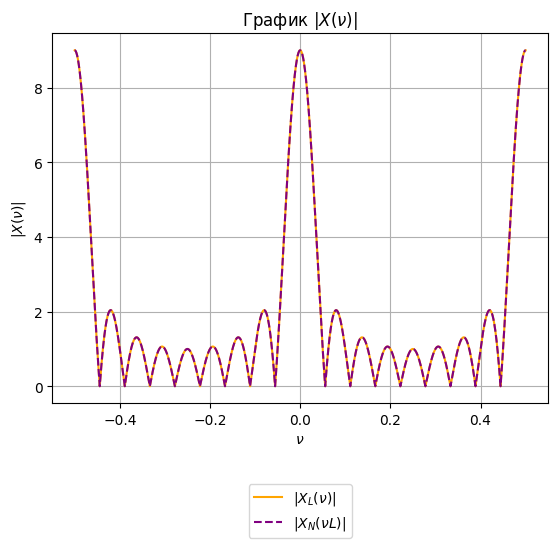

In [111]:
def X_L(nu):
    ret_val = 0.0
    for k in range(N):
        ret_val += np.exp(-1.j * 2 * np.pi * nu * k * 2)
    return ret_val

X_L = np.vectorize(X_L)

plt.plot(nu, np.abs(X_L(nu)), linestyle='-', color="orange", label="$|X_L(\\nu)|$")
plt.plot(nu, np.abs(X_N(nu * L)), linestyle='--', color="purple", label="$|X_N(\\nu L)|$")
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.title("График $|X(\\nu)|$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.show()

# plt.plot(nu, np.angle(X_L(nu)), linestyle='-', color="orange")
# plt.xlabel("$\\nu$")
# plt.ylabel("$arg(X(\\nu))$")
# plt.title("График $arg(X(\\nu))$")
# plt.show()

# ind_r = None
# ind_l = None

# spikes = nu[np.where(np.abs(np.angle(X_L(nu)) - np.angle(X_L(nu - 1 / (steps * 2)))) > np.pi -0.01)]

# ls = np.linspace(0, -0.5, steps)
# for i in range(len(ls)):
#     if abs(X_L(ls[i])) <= abs(X_L(ls[i + 1])) and abs(X_L(ls[i])) <= abs(X_L(ls[i - 1])):
#         ind_l = ls[i]
#         break
    
# ls = np.linspace(0, 0.5, steps)
# for i in range(len(ls)):
#     if abs(X_L(ls[i])) <= abs(X_L(ls[i + 1])) and abs(X_L(ls[i])) <= abs(X_L(ls[i - 1])):
#         ind_r = ls[i]
#         break

# data = {
#     "X_L(0)" : [X_L(0)],
#     "Δν" : [f"{ind_r - ind_l:.2f}"],
#     "Скачок фазы на π" : [" ".join([f"{spike:.2f}" for spike in spikes])],
#     "Энергия² xΔt" : [np.trapezoid(abs(X(nu)) * abs(X(nu)), nu)],
# }
# df = pd.DataFrame(data)
# blankIndex=[''] * len(df)
# df.index=blankIndex

# df

## Задача 1.3.  Дифференцирование спектральной плотности.
Рассмотрите последовательность ${{x}_{D}}[k]=k\,{{x}_{N}}[k]$.  Постройте с помощью моделирования график для модуля ДВПФ этой последовательности ${{X}_{D}}(\nu )$ для $\nu \in [-0,5; \;0,5]$. 

** Получить численным или символьным дифференцированием график для $\frac{j}{2\pi }\frac{d{{X}_{N}}(\nu )}{d\nu }$ и сравнить его с ${{X}_{D}}(\nu ).$ 


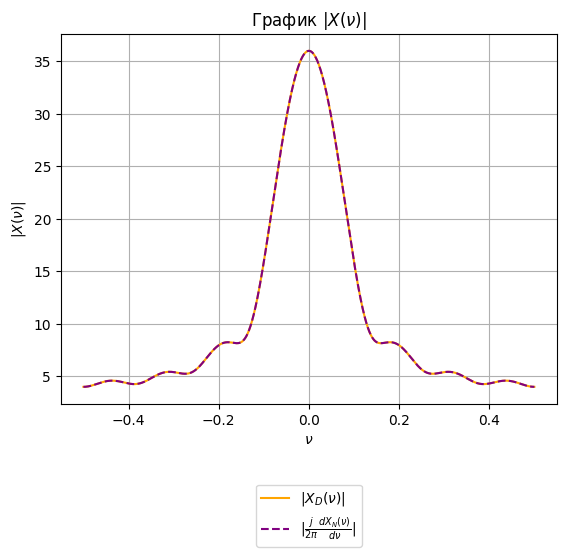

In [112]:
def X_D(nu):
    ret_val = 0.0
    for k in range(N):
        ret_val += np.exp(-1.j * 2 * np.pi * nu * k) * k
    return ret_val

X_D = np.vectorize(X_D)

plt.plot(nu, np.abs(X_D(nu)), linestyle='-', color="orange", label="$|X_D(\\nu)|$")
plt.plot(nu, np.abs(1.j / 2 / np.pi * np.gradient(X_N(nu), nu)), linestyle='--', color="purple", label="$|\\frac{j}{2 \\pi} \\frac{d X_N(\\nu)}{d \\nu}|$")
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.title("График $|X(\\nu)|$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.show()

# plt.plot(nu, np.angle(X_D(nu)), linestyle='-', color="orange")
# plt.xlabel("$\\nu$")
# plt.ylabel("$arg(X(\\nu))$")
# plt.title("График $arg(X(\\nu))$")
# plt.show()

# ind_r = None
# ind_l = None

# spikes = nu[np.where(np.abs(np.angle(X_D(nu)) - np.angle(X_D(nu - 1 / (steps * 2)))) > np.pi -0.01)]

# ls = np.linspace(0, -0.5, steps)
# for i in range(len(ls)):
#     if abs(X_D(ls[i])) <= abs(X_D(ls[i + 1])) and abs(X_D(ls[i])) <= abs(X_D(ls[i - 1])):
#         ind_l = ls[i]
#         break
    
# ls = np.linspace(0, 0.5, steps)
# for i in range(len(ls)):
#     if abs(X_D(ls[i])) <= abs(X_D(ls[i + 1])) and abs(X_D(ls[i])) <= abs(X_D(ls[i - 1])):
#         ind_r = ls[i]
#         break

# data = {
#     "X(0)" : [X_D(0)],
#     "Δν" : [f"{ind_r - ind_l:.2f}"],
#     "Скачок фазы на π" : [" ".join([f"{spike:.2f}" for spike in spikes])],
#     "Энергия² xΔt" : [np.trapezoid(abs(X(nu)) * abs(X(nu)), nu)],
# }
# df = pd.DataFrame(data)
# blankIndex=[''] * len(df)
# df.index=blankIndex

# df

## Задача 1.4. Теорема смещения.
С помощью моделирования получите график модуля спектральной плотности ${{X}_{S}}(\nu )$ для сигнала ${{x}_{S}}[k]={{x}_{N}}[k]\exp (j2\pi {{\nu }_{0}}k)$. Приведите ответы на следующие вопросы.

а) Какую аналитическую форму записи имеет функция ${{X}_{S}}(\nu )$?

$$X_S(\nu) = X_N(\nu - \nu_0) = \sum_{k=0}^{L} e^{-2 \pi j \cdot k \cdot (\nu-\nu_0)}$$


б) Как результат моделирования соотносится с теоремой смещения для ДВПФ? 

__Ответ:__ Полностью совпадает с теорией

в) Почему получившийся спектр не симметричен относительно нулевой частоты? 

__Ответ:__ Он сдвинут на частоту, не кратную частоте дискретизации


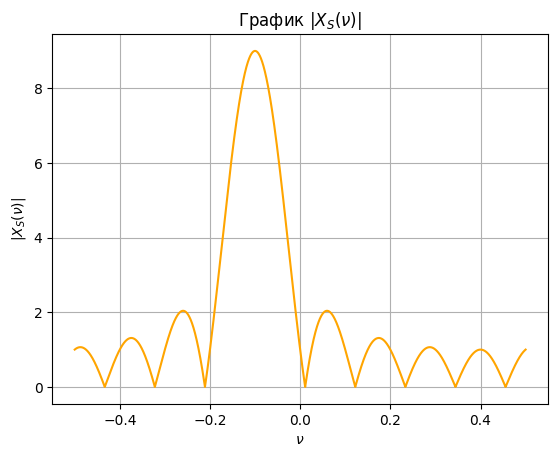

In [113]:
def X_S(nu):
    ret_val = 0.0
    for k in range(N):
        ret_val += np.exp(-1.j * 2 * np.pi * nu * k) * np.exp(1.j * 2 * np.pi * nu_0 * k)
    return ret_val

X_S = np.vectorize(X_S)

plt.plot(nu, np.abs(X_S(nu)), linestyle='-', color="orange")
# plt.plot(nu, np.abs(1.j / 2 / np.pi * np.gradient(X_N(nu), nu)), linestyle='--', color="purple", label="$|\\frac{j}{2 \\pi} \\frac{d X_N(\\nu)}{d \\nu}|$")
plt.xlabel("$\\nu$")
plt.ylabel("$|X_S(\\nu)|$")
plt.title("График $|X_S(\\nu)|$")
plt.show()

## Задача 1.5. Теорема о свертке во временной области. 

Вычислите с помощью моделирования линейную дискретную свертку последовательности ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ с точно такой же последовательностью. Постройте график для модуля ДВПФ  этой последовательности. Воспользовавшись теоремой о свертке, получите аналитическую запись ДВПФ. Заполните таблицу.

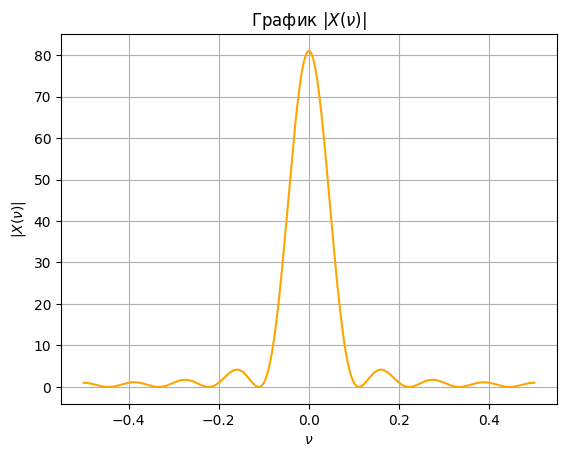

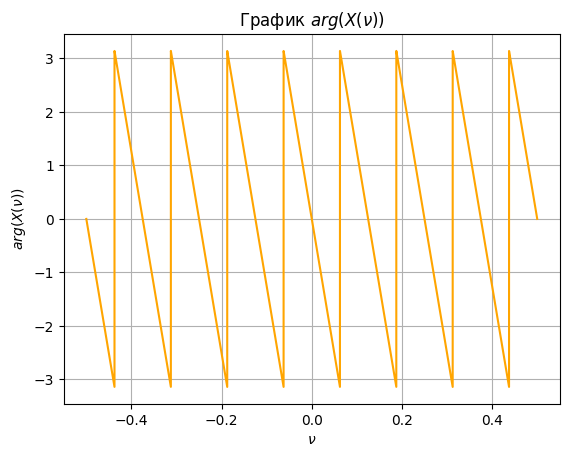

,X(0),Δν,Энергия² xΔt
,(81+0j),0.22,489.0


In [114]:
N_1 = 2 * N - 1
x_n = [0] * N_1
for i in range(N_1):
    for k in range(N):
        x_n[i] += (1 if k >= 0 and k < N else 0) * (1 if (i - k) >= 0 and (i - k) < N else 0)

def X_N_N(nu):
    ret_val = 0.0
    
    for k in range(N_1):
        ret_val += np.exp(-1.j * 2 * np.pi * nu * k) * x_n[k]
    
    return ret_val

X_N_N = np.vectorize(X_N_N)

plt.plot(nu, np.abs(X_N_N(nu)), linestyle='-', color="orange")
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.title("График $|X(\\nu)|$")
plt.show()

plt.plot(nu, np.angle(X_N_N(nu)), linestyle='-', color="orange")
plt.xlabel("$\\nu$")
plt.ylabel("$arg(X (\\nu))$")
plt.title("График $arg(X(\\nu))$")
plt.show()

ind_r = None
ind_l = None

spikes = nu[np.where(np.abs(np.angle(X_N_N(nu)) - np.angle(X_N_N(nu - 1 / (steps)))) > np.pi - 1)]

ls = np.linspace(0, -0.5, steps)
for i in range(len(ls)):
    if abs(X_N_N(ls[i])) <= abs(X_N_N(ls[i + 1])) and abs(X_N_N(ls[i])) <= abs(X_N_N(ls[i - 1])):
        ind_l = ls[i]
        break
    
ls = np.linspace(0, 0.5, steps)
for i in range(len(ls)):
    if abs(X_N_N(ls[i])) <= abs(X_N_N(ls[i + 1])) and abs(X_N_N(ls[i])) <= abs(X_N_N(ls[i - 1])):
        ind_r = ls[i]
        break

data = {
    "X(0)" : [X_N_N(0)],
    "Δν" : [f"{ind_r - ind_l:.2f}"],
    # "Скачок фазы на π" : [" ".join([f"{spike:.2f}" for spike in spikes])],
    "Энергия² xΔt" : [np.trapezoid(abs(X_N_N(nu)) * abs(X_N_N(nu)), nu)],
}
df = pd.DataFrame(data)
blankIndex=[''] * len(df)
df.index=blankIndex

df

# Занятие 2. Основные свойства ДПФ

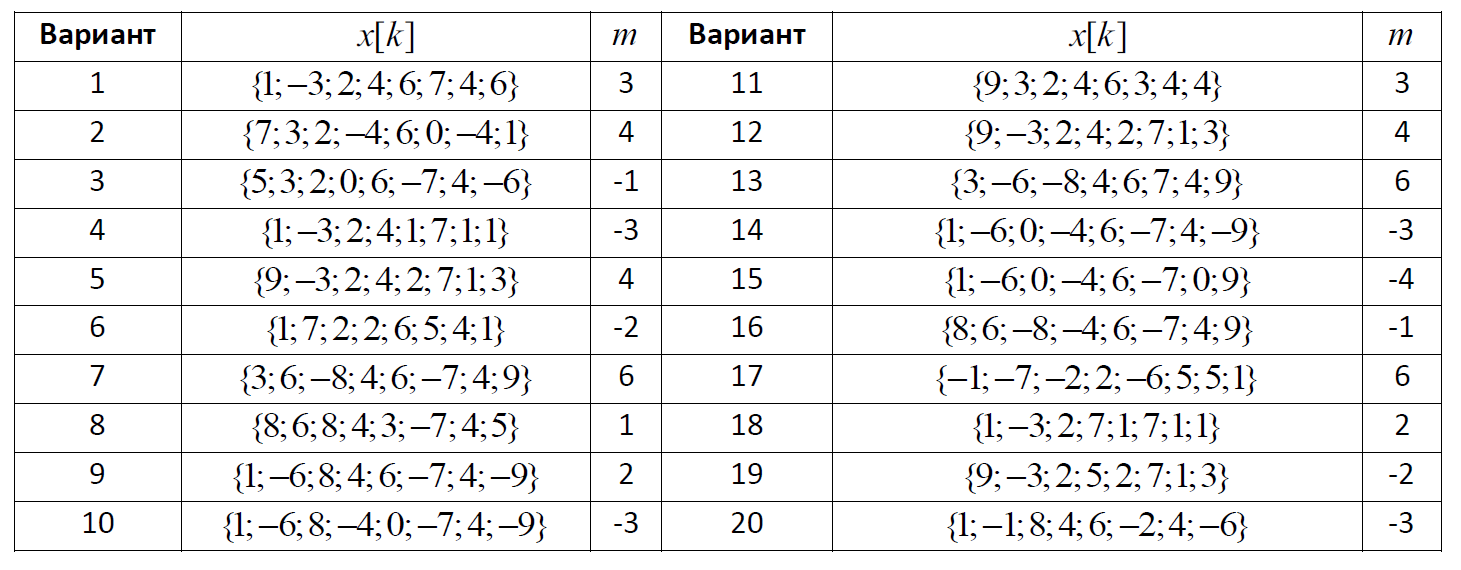

## Задача 2.1. Алгоритмы вычисления ДПФ. 

Вычислите ДПФ $X[n]$ для последовательности $x[k]$ (в соответствии с Вашим вариантом). Воспользуйтесь следующими способами:

а) вычисление с использованием матричной формы ДПФ;

б) алгоритм быстрого преобразование Фурье (БПФ).

Сравните результаты. 


In [115]:
x = [1.0, -6.0, 8.0, -4.0, 0.0, -7.0, 4.0, -9.0]
m = -3

N = 8

In [116]:
# Матричная форма ДПФ

def W(n, k, N):
    return np.exp(-1.j * 2 * np.pi * ((n * k) % N) / N)
    # return ((n * k) % N)

W = np.vectorize(W)

W_x = np.array(range(0, N))[:, np.newaxis]
W_y = np.array(range(0, N))

W_N = W(W_x, W_y, N)

# print(W_N)

X_n = W_N @ x

print(X_n)


[-13.        +0.00000000e+00j  -1.82842712-8.24264069e+00j
 -11.        -1.46957616e-15j   3.82842712-2.42640687e-01j
  39.        +3.18408168e-15j   3.82842712+2.42640687e-01j
 -11.        -1.46957616e-15j  -1.82842712+8.24264069e+00j]


In [117]:
# Алгоритм быстрого ДПФ

X_n_f = np.fft.fft(x)

print(X_n_f)

[-13.        +0.j          -1.82842712-8.24264069j
 -11.        +0.j           3.82842712-0.24264069j
  39.        +0.j           3.82842712+0.24264069j
 -11.        +0.j          -1.82842712+8.24264069j]


## Задача 2.2  Свойства симметрии ДПФ. 

Для последовательности $x[k]$ постройте графики $\text{Re}\ X[n]$, $\text{Im}\ X[n]$, $\left| X[n] \right|$, $\angle \ X[n]$.

Сравните получившиеся результаты со свойствами симметрии ДПФ. 


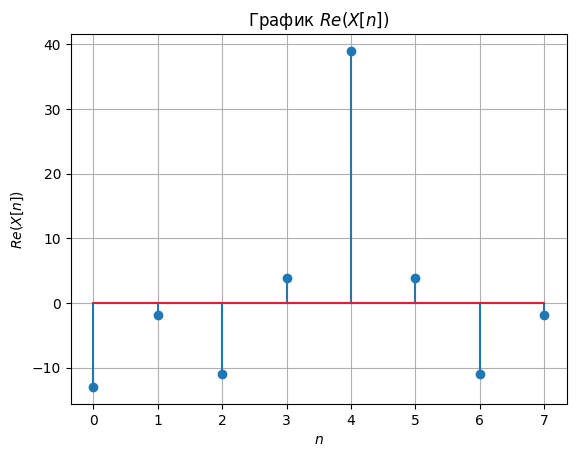

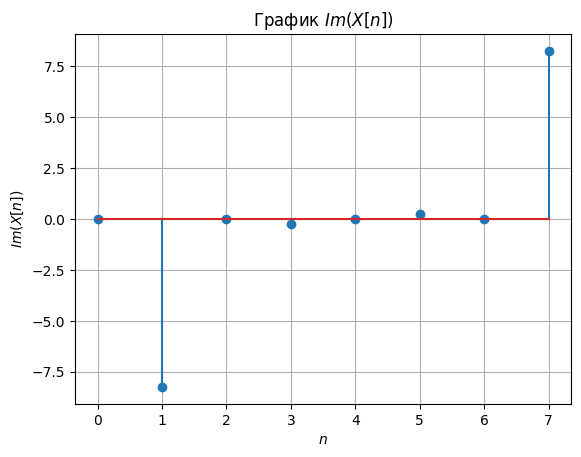

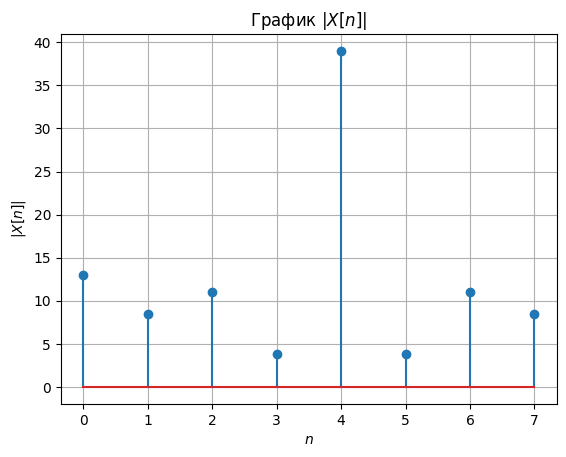

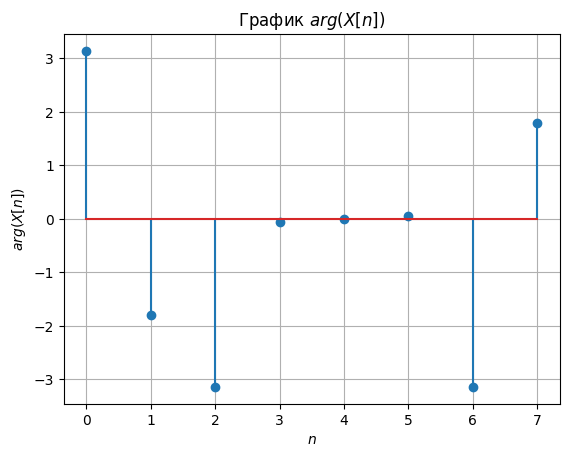

In [118]:

n_i = list(range(N))

plots = [(np.real, "Re(X[n])"), (np.imag, "Im(X[n])"), (np.abs, "|X[n]|"), (np.angle, "arg(X[n])")]

for plot in plots:
    func, name = plot
    plt.stem(n_i, func(X_n[n_i]))
    plt.xlabel("$n$")
    plt.ylabel(f"${name}$")
    plt.title(f"График ${name}$")
    plt.show()


## Задача 2.3.  Циклический сдвиг в ДПФ. 


Постройте график для последовательности $x[k]$.
Вычислите последовательность $y[k]$, ДПФ которой 
$Y[n]=\exp \left( -j\frac{2\pi }{8}mn \right)X[n].$

Сравните получившиеся последовательности. 

__Комментарий__ Сигнал циклически сдвинулся влево на $m$

8


/home/vlad/Documents/VSCode/RadioPhysicsLabs/venv/lib64/python3.13/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/vlad/Documents/VSCode/RadioPhysicsLabs/venv/lib64/python3.13/site-packages/numpy/ma/core.py:3448: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/home/vlad/Documents/VSCode/RadioPhysicsLabs/venv/lib64/python3.13/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


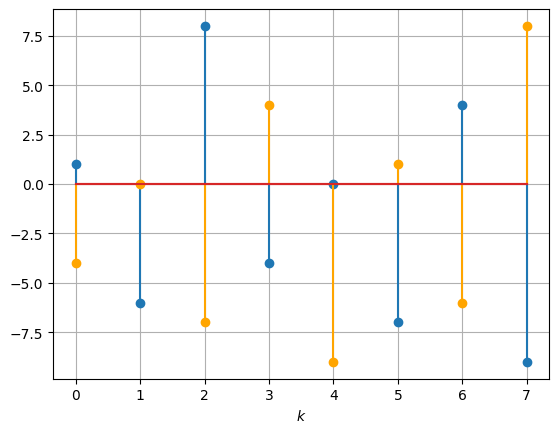

In [119]:
plt.stem(x)
print(N)
plt.stem((X_n * np.array([np.exp(-1.j * 2 * np.pi * n * m / 8) for n in range(N)]) @ np.conj(W_N) / N), markerfmt="orange", linefmt="orange")
plt.xlabel("$k$")
plt.show()

# Занятие 3. Связь ДВПФ и ДПФ

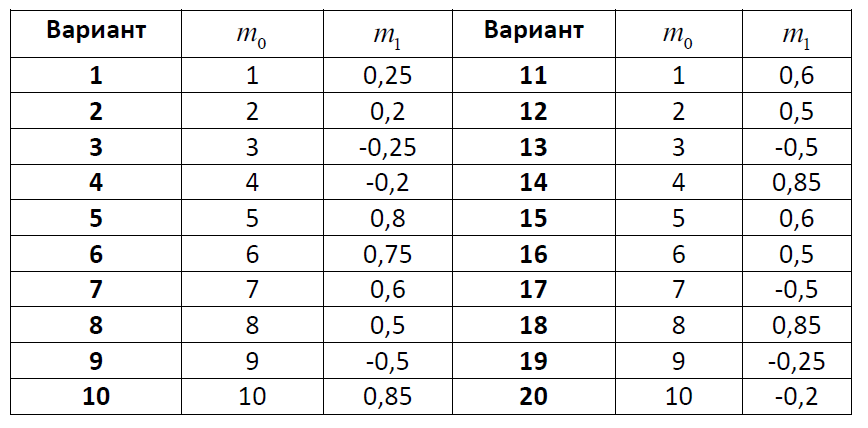

## Задача 3.1. Интерполяция  ДВПФ добавлением нулевых отсчетов в сигнал.

Постройте на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$ последовательности ($N=32$)
$$x[k]=\left\{ \begin{array}{ll}
   \sin \left( \dfrac{2\pi}{N}m_{0}k \right) + \sin \left( \dfrac{2\pi}{N}(m_{0} + 0.25)k \right), & 0 \leq k \leq N-1; \\
   0, & \text{при других } k.
\end{array} \right.$$
Увеличьте размерность ДПФ, добавив нулевые отсчеты так, чтобы все относительные частоты синусоид попадали на бины ДПФ.  Приведите на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$  для этого случая. Сравните результаты. 

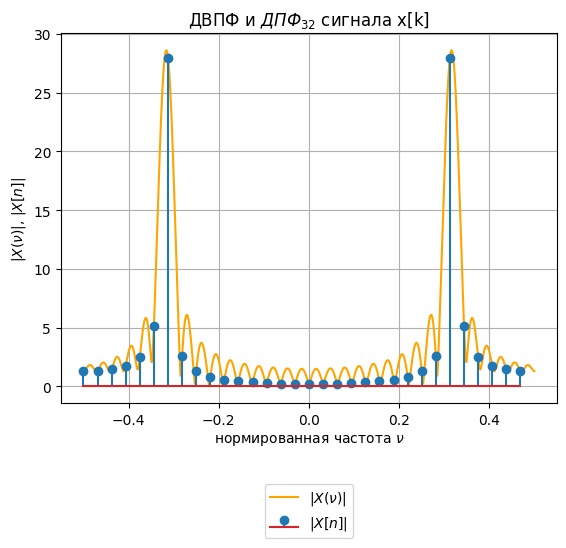

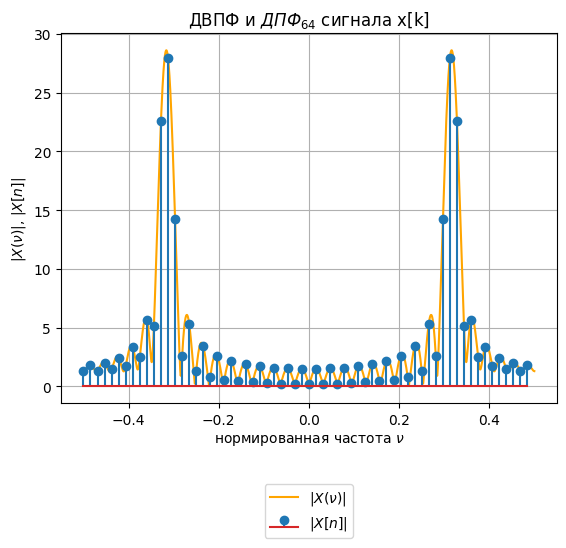

In [120]:
m_0 = 10
m_1 = 0.85

N = 32

M = 4096

x_n = np.array([np.sin(2 * np.pi * m_0 * k / N) + np.sin(2 * np.pi * (m_0 + 0.25) * k / N) for k in range(32)])

N = len(x_n)
ns = np.arange(N)
DFT = np.abs(np.fft.fftshift(np.fft.fft(x_n)))

nu_i = np.arange(M)/M-0.5
DTFT = np.abs(np.fft.fftshift(np.fft.fft(x_n, M)))
plt.plot(nu_i, DTFT, label=r"$|X(\nu)|$", color="orange")

plt.stem(ns / N - 1/2, DFT, label=r"$|X[n]|$")
plt.xlabel(r"нормированная частота $\nu$")
plt.ylabel(r"$|X(\nu)|$, $|X[n]|$")
plt.title(f"ДВПФ и $ДПФ_{{{N}}}$ сигнала x[k]")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.show()

x_n = np.concat((x_n, np.zeros(32)))

N = len(x_n)
ns = np.arange(N)
DFT = np.abs(np.fft.fftshift(np.fft.fft(x_n)))

nu_i = np.arange(M)/M-0.5
DTFT = np.abs(np.fft.fftshift(np.fft.fft(x_n, M)))
plt.plot(nu_i, DTFT, label=r"$|X(\nu)|$", color="orange")

plt.stem(ns / N - 1/2, DFT, label=r"$|X[n]|$")
plt.xlabel(r"нормированная частота $\nu$")
plt.ylabel(r"$|X(\nu)|$, $|X[n]|$")
plt.title(f"ДВПФ и $ДПФ_{{{N}}}$ сигнала x[k]")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.show()


## Задача 3.2. ДВПФ и ДПФ периодической последовательсти.

Простройте графики для действительной  и мнимой части коэффициентов ДПФ $\tilde{X}[n]$ периодической последовательности $x[k]=\cos \left( \frac{2\pi }{N}mk \right)+\sin \left( \frac{2\pi }{N}mk \right)$  с периодом $N=32$, для случаев $m={{m}_{0}}$ и $m={{m}_{0}}+{{m}_{1}}$. Получите аналитическую запись ДПФ. Сравните ДПФ последовательности с ее ДВПФ. Определите, выполняется ли связь между весами дельта-функций в ДВПФ и величинами отсчетов ДПФ. 

$$\tilde{X}[n] = \sum_{k=0}^{N-1} \cos(\frac{2 \pi}{N} m k) e^{-2 i \pi n} + \sin(\frac{2 \pi}{N} m k) e^{-2 i \pi n}$$

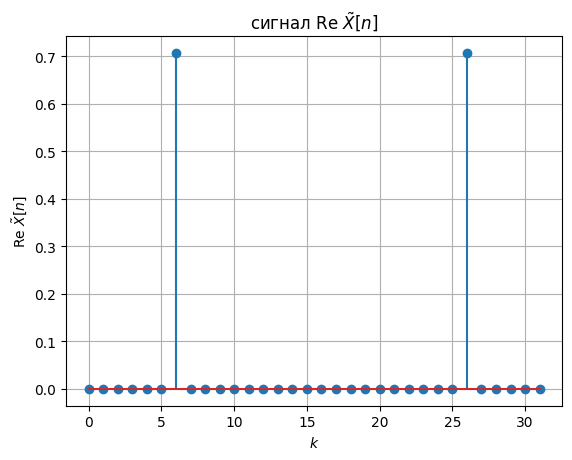

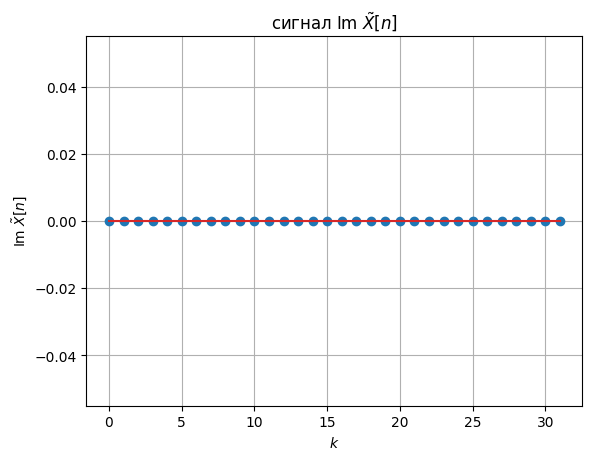

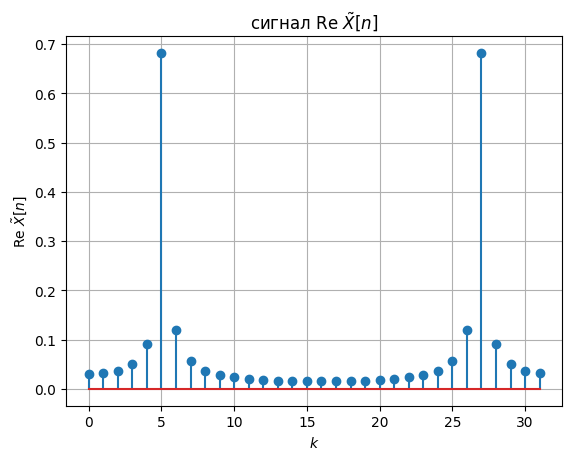

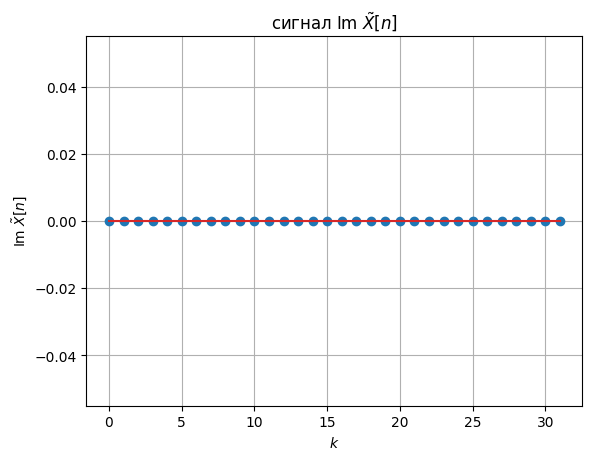

In [147]:
def plot_FT(m):
    N = 32
    xk = [np.cos(2 * np.pi * m * k / N) + np.sin(2 * np.pi * m * k / N) for k in range(N)]
    Xn = np.abs(np.fft.fftshift(np.fft.fft(xk))) / N
    
    plt.title("сигнал Re $\\tilde{X}[n]$")
    plt.stem(np.real(Xn))
    plt.xlabel("$k$")
    plt.ylabel("Re $\\tilde{X}[n]$")
    plt.show()
    
    plt.stem(np.imag(Xn))
    plt.title("сигнал Im $\\tilde{X}[n]$")
    plt.xlabel("$k$")
    plt.ylabel("Im $\\tilde{X}[n]$")
    plt.show()

plot_FT(m_0)
plot_FT(m_0 + m_1)

# Примеры вычислений на Python для лабораторной работы №2 "ДВПФ и ДПФ"

## Задание последовательности отсчетов

Зададим последовательность из 10 единичных импульсов $w[k] = \sum_{m=0}^{N-1} \mathbf{1}[k-m]$

In [122]:
w = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
w

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Сделаем тоже самое с помощью функции `ones`

In [123]:
w1=np.ones(10)
w1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Выведем график последовательности $w[k] = \sum_{m=0}^{N-1} \mathbf{1}[k-m]$

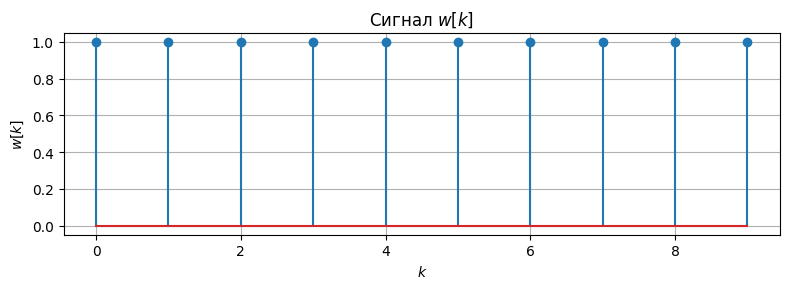

In [124]:
N=len(w)
k = np.arange(N)
plt.figure(figsize=[8, 3])
plt.stem(k, w)
plt.title('Сигнал $w[k]$')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.tight_layout()

Определим последовательность вида $y[k]=\exp(j2\pi \nu_0 k) w[k]$

In [125]:
k = np.arange(N)
nu_0 = 0.25
y=np.exp(1j*2*np.pi*nu_0*k)
y

array([ 1.0000000e+00+0.0000000e+00j,  6.1232340e-17+1.0000000e+00j,
       -1.0000000e+00+1.2246468e-16j, -1.8369702e-16-1.0000000e+00j,
        1.0000000e+00-2.4492936e-16j,  3.0616170e-16+1.0000000e+00j,
       -1.0000000e+00+3.6739404e-16j, -4.2862638e-16-1.0000000e+00j,
        1.0000000e+00-4.8985872e-16j,  5.5109106e-16+1.0000000e+00j])

Определим дискретную линейную свертку (Convolution) последовательности $w[k]$ c точно такой же последовательностью.

In [126]:
w2=signal.convolve(w, w)
w2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1])

Выведем график для такой последовательности:

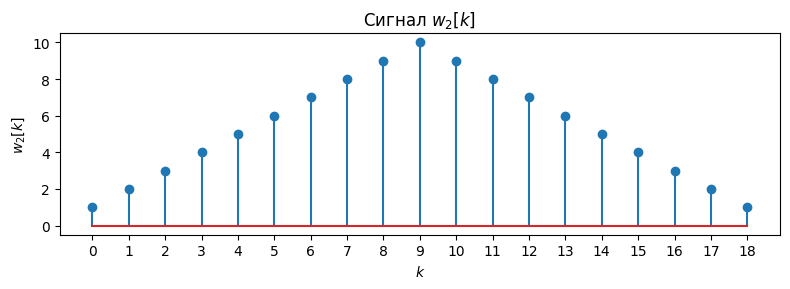

In [127]:
N=len(w2)
k = np.arange(0, N)
plt.figure(figsize=[8, 3])
plt.stem(k, w2)
plt.title('Сигнал $w_2[k]$')
plt.xlabel('$k$')
plt.ylabel('$w_2[k]$')
plt.grid()
plt.xticks(k) # установить деления шкалы абсцисс для каждого отсчета
plt.tight_layout()

Поэлементное умножение задается оператором `*`

In [128]:
w2*w2

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100,  81,  64,  49,
        36,  25,  16,   9,   4,   1])

## Вычисление ДВПФ

Определим ДВПФ последовательности $w[k]=\sum_{m=0}^{N-1} \mathbf{1}[k-m]$ 

In [129]:
def dtft(x, M=2048):
    return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

In [130]:
nu, W = dtft(w, M=2048)

* `nu` — массив частот $\nu \in [-0.5;0.5)$ с шагом сетки $\Delta \nu =1/M$,
* `W` — значения ДВПФ $W(\nu )$ в этих точках, 
* `dtft` — функция, 
* `w` — последовательность отсчетов, 
* `M` — число точек на сетки оси частот, в которых вычисляется ДВПФ. 

Построим график для модуля ДВПФ

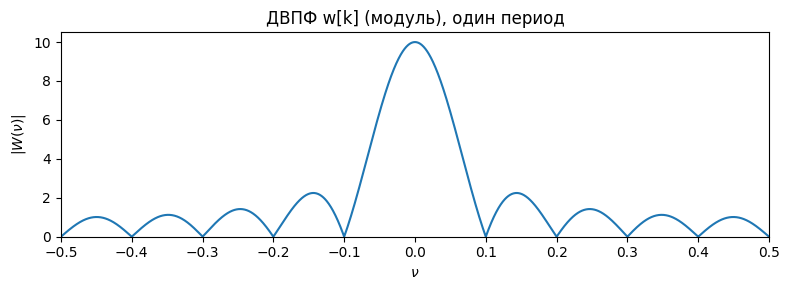

In [131]:
plt.figure(figsize=[8, 3])
nu, W = dtft(w, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Теперь выведем фазовую часть ДВПФ

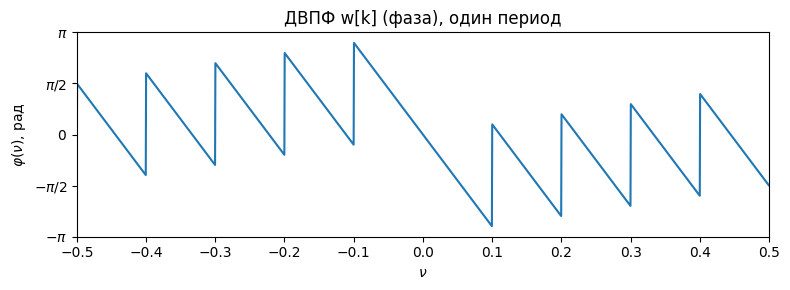

In [132]:
plt.figure(figsize=[8, 3])
plt.plot(nu, np.angle(W))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('ДВПФ w[k] (фаза), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$\\varphi(\\nu)$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Вычисление ДПФ

Вычислим ДПФ $N$-точечной последовательности

$$x[k]=\sin \left(2\pi \frac{2}{N}k\right)+\cos \left(2\pi \frac{3}{N}k\right),\;\;k=0,1,\dots ,N-1,\;\;N=8.$$

Формула прямого ДПФ в данном случае без нормирующего множителя $1/N$:
$$X[n]=\sum_{k=0}^{N-1} x[k]\exp \left(-j2\pi \frac{nk}{N}\right)$$
Сначала воспользуемся матричной формой ДПФ. Функция `scipy.linalg.dft(N)` возвращает матрицу ДПФ $[W]_N$ размера $N\times N$. 


In [133]:
N=8
k=np.arange(N)
x=np.sin(2*np.pi*2/N*k)+np.cos(2*np.pi*3/N*k)
W8 = dft(N)
Xn = W8 @ x
Xn

array([-8.07156228e-17+0.00000000e+00j,  8.88178420e-16-7.67444448e-16j,
        1.85570158e-16-4.00000000e+00j,  4.00000000e+00+8.90860265e-17j,
        1.25155201e-15+9.86076132e-31j,  4.00000000e+00+4.71970162e-15j,
       -5.11882929e-15+4.00000000e+00j,  2.22044605e-16-2.51954864e-15j])

Построим графики. 

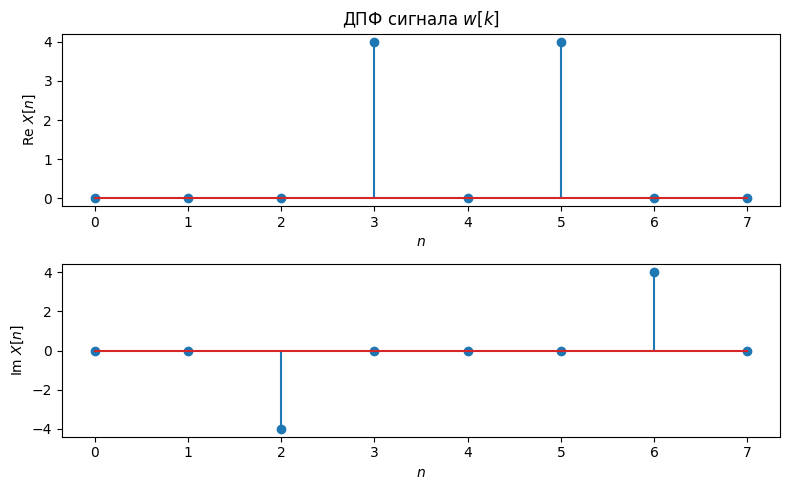

In [134]:
plt.figure(figsize=[8, 5])

n=np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, Xn.real)
plt.xticks(n)
plt.title('ДПФ сигнала $w[k]$')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, Xn.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')

plt.grid()
plt.tight_layout()

Теперь проведем вычисление ДПФ по алгоритму быстрого преобразования Фурье (БПФ). Для этого воспользуемся функцией `np.fft.fft()`.


In [135]:
Xn1=np.fft.fft(x)
Xn1

array([-3.09256603e-17+0.00000000e+00j,  6.66133815e-16+1.94671210e-16j,
       -1.07929736e-15-4.00000000e+00j,  4.00000000e+00-1.76476367e-15j,
        1.30134197e-15+0.00000000e+00j,  4.00000000e+00+1.76476367e-15j,
       -1.07929736e-15+4.00000000e+00j,  6.66133815e-16-1.94671210e-16j])

Сравним результаты.

In [136]:
max(abs(Xn1-Xn))

np.float64(4.2535579475330355e-15)

## Вычисление обратного ДПФ


Матрица обратного ДПФ может быть найдена как обратная матрица для $[W]_N$.

In [137]:
W8_inv1 = np.linalg.inv(W8)

Также ее можно получить с помощью транспонирования и комплексного сопряжения (эрмитова сопряжения) c дополнительной нормировкой на $N$, в силу того, что $[W]_N^{-1} =\frac{1}{N}{\left([W]_N^T \right)}^* =\frac{1}{N}[W]_N^*$. 


In [138]:
W8_inv2 = np.conjugate(W8) / N

Вычислим обратное ДПФ, используя матричную форму. Сравним результат с исходной последовательностью. 


In [139]:
x1 = W8_inv1 @ Xn
max(abs(x1-x))

np.float64(5.845309980720432e-16)

Выполним те же вычисления с использованием алгоритма БПФ. Для этого нам понадобится функция `np.fft.ifft()`

In [140]:
x2=np.fft.ifft(Xn)
max(abs(x2-x))

np.float64(1.526600783182116e-15)

## Интерполяция ДВПФ добавлением нулевых отсчетов

Построим на одном графике модули ДПФ и ДВПФ $N$-точечной последовательности ($N=16$)

$$x[k]=\sin \left(2\pi \frac{5.5}{16} k \right),\;\;k=0,1,\dots ,N-1.$$

In [141]:
N=16
k=np.arange(N)
n=np.arange(N)
x=np.sin(2*np.pi*5.5*k/N)

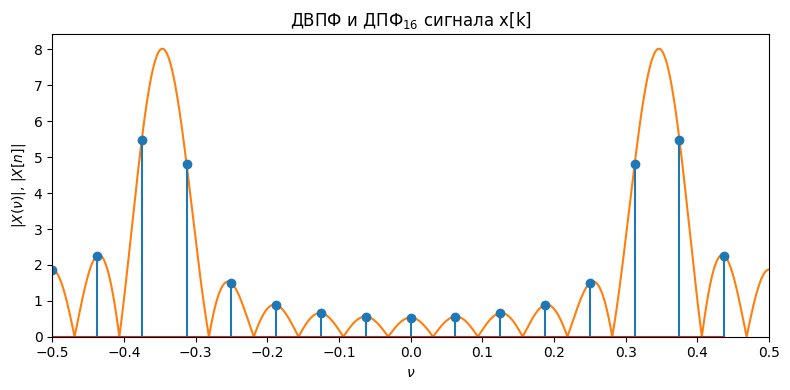

In [142]:
plt.figure(figsize=[8, 4])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

M=N
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), linefmt='C0', markerfmt='C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Здесь функция `np.fft.fftshift` позволяет циклически сдвинуть вычисленные отсчеты ДПФ так, чтобы они соответствовали частотам$\nu_n \in [-0.5;0.5)$, $\nu_n =-0.5+\frac{n}{N}.$

Относительная частота синусойды $\nu_0 =\frac{6.5}{16}$ не попадет на сетку частот ДПФ. В результате спектральные максимумы недостаточно хорошо визуализируются отсчетами ДПФ. Чтобы это улучшить, добавим к последовательности, используемой при вычислении ДПФ, нулевые отсчеты в конец сигнала. Для этого досточно указать второй параметр функции `np.fft.fft(x, M)` равный новому числу отсчетов. 


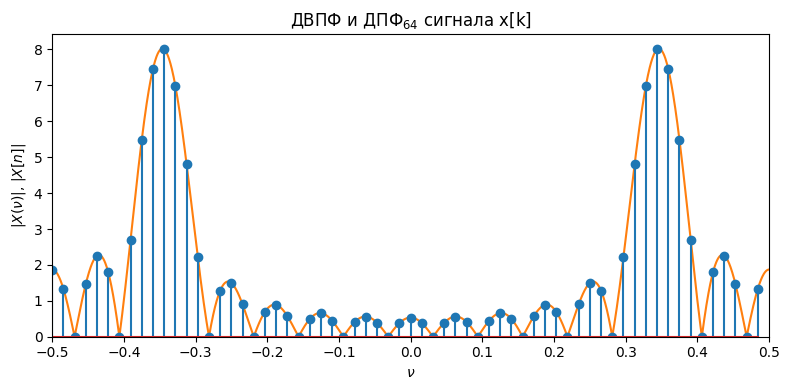

In [143]:
plt.figure(figsize=[8, 4])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

Nz=48
M=N+Nz
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), linefmt='C0', markerfmt='C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()